In [1]:
import csv
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [5, 5]

In [2]:
def read_points(dataset_name):
    points = []
    with open (dataset_name, 'r') as fin:
        csvReader = csv.reader(fin, delimiter=',')
        for row in csvReader:
            if csvReader.line_num != 1:
                float_row = []
                for i in range(len(row)):
                    float_row.append(float(row[i]))
                points.append(float_row)
    return points

In [3]:
def draw_point(x, y, color, size=20):
    plt.scatter(x, y, size, color)

In [4]:
import numpy as np

In [5]:
def generateMinMax(points):
    mins = []
    maxs = []
    for point in points:
        if mins == []:
            for i in range(len(point)):
                mins.append(point[i])
                maxs.append(point[i])
        else:
            for i in range(len(point)):
                mins[i] = min(mins[i], point[i])
                maxs[i] = max(maxs[i], point[i])
    return (mins, maxs)

In [6]:
def distance(x, y):
    return ((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2) ** (0.5)

In [7]:
def kMeans(dataset_name, cluster_num):
    colors = ['hotpink', 'lime', 'slateblue', 'orangered', 'indigo', 'gold']
    colorPoints = {'hotpink' : [], 'lime' : [], 'slateblue' : [], 'orangered' : [], 'indigo' : [], 'gold' : []}
    centers = []
    points = read_points(dataset_name)
    
    def nextIteration(centers):
        for point in points:
            minD = distance(point, centers[0])
            color = colors[0]
            for j in range(1, len(centers)):
                d = distance(point, centers[j])
                if minD > d:
                    minD = d
                    color = colors[j]
            colorPoints[color].append(point)
        centers = []
        for i in range(cluster_num):
            summ = [0,0]
            color = colors[i]
            if not len(colorPoints[color]):
                return []
            for point in colorPoints[color]:
                summ[0] += point[0]
                summ[1] += point[1]   
            summ[0] = summ[0] / len(colorPoints[color])
            summ[1] = summ[1] / len(colorPoints[color])
            centers.append(summ)
        return centers
    
    def start():
        mins, maxs = generateMinMax(points)
        centers = zip(np.random.uniform(mins[0], maxs[0], cluster_num), np.random.uniform(mins[1], maxs[1], cluster_num))
        colorPoints = {'hotpink' : [], 'lime' : [], 'slateblue' : [], 'orangered' : [], 'indigo' : [], 'gold' : []}
        return centers
    
    centers = start()
    while (True):
        oldCenters = centers
        centers = nextIteration(centers)
        if centers == []:
            centers = start()
        else:
            if (centers == oldCenters):
                for color in colors:
                    for point in colorPoints[color]:
                        draw_point(point[0], point[1], color)
                for i in range(len(centers)):
                    draw_point(centers[i][0], centers[i][1], 'black', 30)
                plt.show()
                return
            colorPoints = {'hotpink' : [], 'lime' : [], 'slateblue' : [], 'orangered' : [], 'indigo' : [], 'gold' : []}

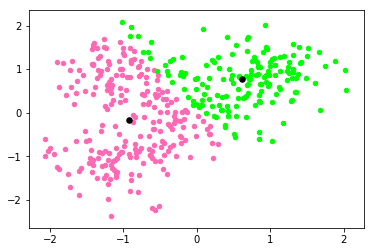

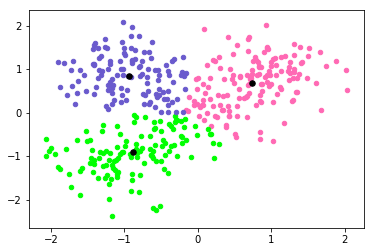

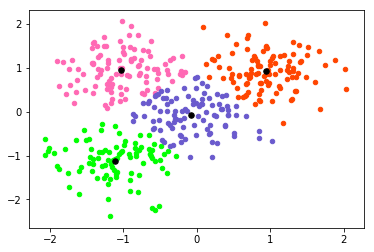

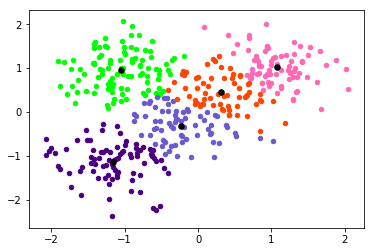

In [8]:
for i in range(2, 6):
    kMeans('datasets/blobs.csv', i)